**Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.**
 **Perform following tasks:**
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [4]:
pip install seaborn

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.6 kB 186.2 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.6 kB 163.4 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.6 kB 163.4 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.6 kB 192.5 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.6 kB 192.5 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/294.6 kB 178.6 kB/s eta 0:00:02
   ------------ -------------------------- 92.2/294.6 kB 194.1 kB/s eta 0:00:02
   ------------ -------------------------- 92.2/294.6 kB 194.1 kB/s eta 0:00:02
   -------------- ----------------------- 112.6/294.6 kB 204.8 kB/s eta 0

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("uber.csv")

**1. Preprocess the Dataset**

In [7]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [9]:
df.isna()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


In [10]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
df.describe(include = "all")

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000,200000.000000,200000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
unique,NaN,200000,NaN,196629,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-05-07 19:52:06.0000003,NaN,2014-04-13 18:19:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,4,NaN,NaN,NaN,NaN,NaN
mean,2.771250e+07,NaN,11.359955,NaN,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,NaN,9.901776,NaN,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,NaN,-52.000000,NaN,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,NaN,6.000000,NaN,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,NaN,8.500000,NaN,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,NaN,12.500000,NaN,-73.967154,40.767158,-73.963658,40.768001,2.000000


In [12]:
df = df.dropna()

In [13]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [14]:
df.isna().any()

Unnamed: 0           False
key                  False
fare_amount          False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
passenger_count      False
dtype: bool

**2. Identify Outliers**

In [15]:
df = df.loc[df['pickup_longitude']>=-180]
df = df.loc[df['pickup_longitude']<=180]
df = df.loc[df['pickup_latitude']>=-90]
df = df.loc[df['pickup_latitude']<=90]
df = df.loc[df['dropoff_longitude']>=-180]
df = df.loc[df['dropoff_longitude']<=180]
df = df.loc[df['dropoff_latitude']>=-90]
df = df.loc[df['dropoff_latitude']<=90]

In [16]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [17]:
def dist(lon1, lat1, lon2, lat2):
    
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    dlat = (lat2 - lat1)
    dlon = (lon2 - lon1)
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    
    c = 2 * np.arcsin(np.sqrt(a)) * 6371
    return c

In [18]:
df['Distance'] = dist(
    df['pickup_longitude'],
    df['pickup_latitude'],
    df['dropoff_longitude'],
    df['dropoff_latitude']
    )

In [19]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


Text(0, 0.5, 'Fare Amount')

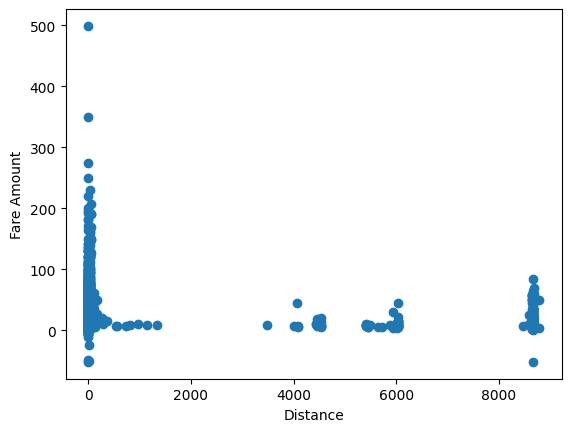

In [20]:
plt.scatter(df.Distance, df.fare_amount)
plt.xlabel('Distance')
plt.ylabel('Fare Amount')

In [21]:
df.drop(df[df['Distance'] >= 60].index, inplace = True)
df.drop(df[df['fare_amount'] <= 0].index, inplace = True)
df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )

Text(0, 0.5, 'Fare Amount')

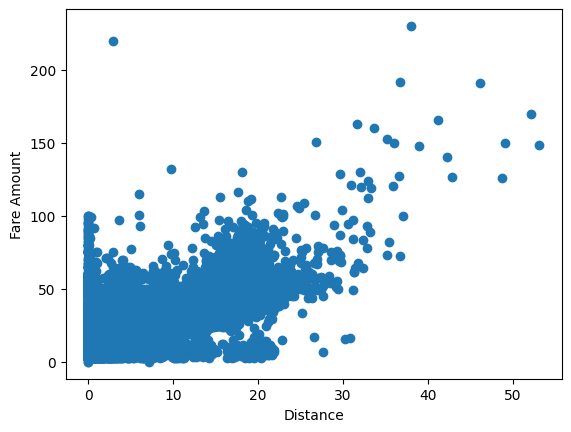

In [24]:
plt.scatter(df.Distance, df.fare_amount)
plt.xlabel('Distance')
plt.ylabel('Fare Amount')

**3. Check Correlation**

<Axes: >

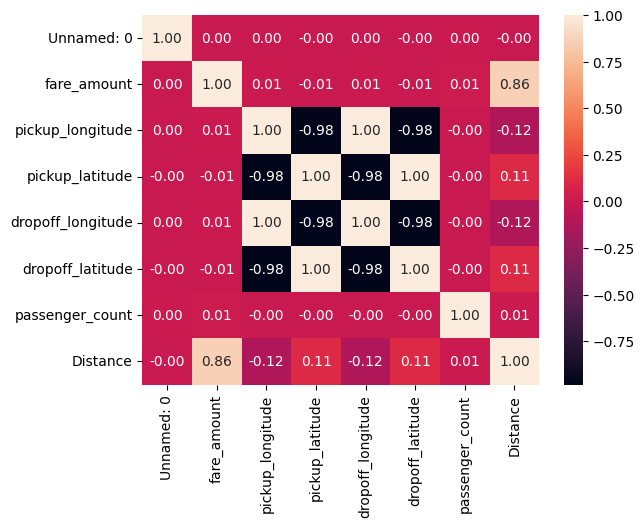

In [27]:
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")

**4. Implement linear regression and random forest regression models.**

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [36]:
x = df['Distance'].values.reshape(-1,1)
y = df['fare_amount'].values.reshape(-1,1)
x

array([[ 1.68332275],
       [ 2.45758988],
       [ 5.03637719],
       ...,
       [12.85031912],
       [ 3.53971545],
       [ 5.41778348]])

In [37]:
ss = StandardScaler()
x_scaled = ss.fit_transform(x)
y_scaled = ss.fit_transform(y)
x_scaled

array([[-0.43823752],
       [-0.22258726],
       [ 0.49566118],
       ...,
       [ 2.67201421],
       [ 0.07880828],
       [ 0.60189114]])

In [38]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x_scaled, y_scaled, test_size=0.2) 

In [48]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=10)

In [49]:
lr.fit(Xtrain, Ytrain)
y_pred = lr.predict(Xtest)

result = pd.DataFrame()
result[['Actual']] = Ytest
result[['Predicted']] = y_pred
result.head()

,Actual,Predicted
0,0.871983,1.163997
1,-0.627260,-0.251596
2,-0.627260,-0.448482
3,-0.294095,-0.143408
4,-0.460677,-0.353262


In [52]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)
# fit the regressor with training dataset
rf_reg.fit(Xtrain,Ytrain)

C:\Users\anike\anaconda3\envs\yoga_pose\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=10)

In [53]:
y_pred_RF = rf_reg.predict(Xtest)
result = pd.DataFrame()
result[['Actual']] = Ytest
result['Predicted'] = y_pred_RF
result.sample(10)

,Actual,Predicted
33642,-0.502323,-0.191001
23099,0.538818,1.283547
6320,-0.085867,-0.235166
32723,-0.627260,-0.547613
24661,0.288944,1.262818
15089,0.413881,1.185263
10733,1.621605,-0.006929
11146,-0.502323,-0.563855
995,-0.543969,-0.631008
28850,-0.668906,-0.678068


In [56]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Ytest, y_pred_RF))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(Ytest, y_pred_RF))
print('Mean Squared Error:', metrics.mean_squared_error(Ytest, y_pred_RF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Ytest, y_pred_RF)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(Ytest, y_pred_RF)))

Mean Absolute Error: 0.3040698314094506
Mean Absolute % Error: 2.1339941880006745
Mean Squared Error: 0.3219134825874655
Root Mean Squared Error: 0.5673741997901081
R Squared (R²): 0.8307784771014469
